# nmi | 2024 spring
## lecture 04 : rootfinding : newtons, secant


#### 1.1.2 speed, accuracy of bisection


given continuous $f(x)$ and $x\in [a,b]$, interval $[a_n,b_n]$ has length $\frac{b-a}{2^n}$ and brackets the best solution after $n$ steps. ie, $x^* \approx x_c = \frac{a_n+b_n}{2}$ with
</br></br>

\begin{align}
  \text{error, bound:} &\qquad \Delta x < \epsilon \quad\Rightarrow\quad |x_c-x^*| < \frac{b-a}{2^{n+1}} \\
  \text{function evaluations:} &\qquad n+2.
\end{align}
</br>

note: its not that you cant use the accumulated rounding error theorem of the previous two lectures but to compare methods $f(x)$ is the same. ie, the operations required per $f(x)$ is the same no matter how its usage within an approximation method. ie, its simpler to tally function calls.
</br></br>



<b>def 1.3</b> a solution is <b>correct within $p$ decimal places</b> if error is less than $0.5x10^{-p}$.
</br>


ex. $x = cosx \Rightarrow y = f(x) = cosx - x = 0$, $x\in [0,1]$. use bisection to find a root $x^*$ within six decimal places.
</br></br>

after $n$ steps,
</br>

\begin{align}
  |x_c-x^*| &< \frac{b-a}{2^{n+1}} \le \frac{1\times10^{-6}}{2} \\
  \\
  &\quad\Downarrow \\
  \\
  \epsilon &= \frac{1-0}{2^{n+1}} \le 0.5\times10^{-6} \\
  \\
  &\quad\Downarrow \\
  \\
  n &> \frac{6}{log_{10}2} \approx \frac{6}{0.301} \approx 19.9.
\end{align}
</br>

ie, for accuracy within six decimal places, 20 steps are needed.
</br>



error analysis helps set iteration limits, provides metrics when comparing efficiency (ie, accuracy gain per iteration).
</br>


#### 1.2.3 linear convergence of FPI

consider linear functions, $g_1(x) = -\frac{3}{2}x + \frac{5}{2}$ and $g_2(x) = -\frac{1}{2}x + \frac{3}{2}$. while both have fixed point of $x^* = 1$, $|g_1'(1)| = |-\frac{3}{2}| > 1$, $|g_2'(1)| = |-\frac{1}{2}| < 1$.
</br>


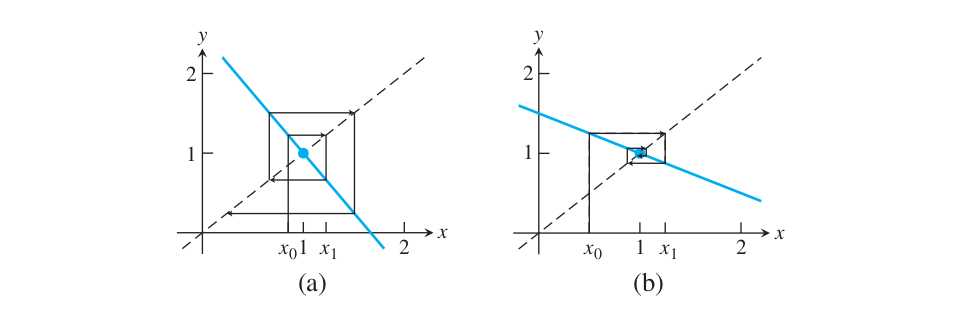

\begin{align}
  g_1(x) &= -\frac{3}{2}(x-1) + 1 \\
  \Rightarrow g_1(x)-1 &= -\frac{3}{2}(x-1) \\
  \Rightarrow x_{i+1} - 1 &= -\frac{3}{2}(x_i-1) \\
  e_i &= |x_i - x^*| \Rightarrow e_{i+1} = \frac{3}{2}e_i \\
  \\
  g_2(x) &= -\frac{1}{2}(x-1) + 1 \\
  \Rightarrow g_2(x)-1 &= -\frac{1}{2}(x-1) \\
  \Rightarrow x_{i+1} - 1 &= -\frac{1}{2}(x_i-1) \\
  e_i &= |x_i - x^*| \Rightarrow e_{i+1} = \frac{1}{2}e_i
\end{align}
</br>



<b>def 1.5</b> let $e_i$ denote error at step $i$ of an iterative method. if
</br></br>

$$\lim_{i\rightarrow\infty}\frac{e_{i+1}}{e_i} = S < 1,$$
</br>

the method obeys <b>linear convergence</b> with rate $S$.
</br>

<b>th 1.6</b> assume $g$ is continuously differentiable, that $g(x^*) = x^*$ and $S=|g'(x*)|<1$. then FPI converges linearly with rate $S$ to $x^*$ for guesses $x_0$ sufficiently close to $x^*$.
</br>


##### proof


let $x_i$ denote iterate at step $i$. by mean value theorem (MVT), there exists number $c_i$ between $x_i$ and $x^*$ such that
</br></br>

\begin{align}
  x_{i+1} - x^* &= g'(c_i)(x_i-x^*) \\
  \\
  &\quad\Downarrow \quad x_{i+1} = g(x_i), x^* = g(x^*), e_i = |x_i - x^*|\\
  \\
  e_{i+1} &= |g'(c_i)|e_i.
\end{align}
</br>

if $S = |g'(r)| < 1$, then by continuity of $g'$ there is small neighborhood around $x^*$ for which $S<|g'(x)|<(S+1)/2<1$. if $x_i$ in this neighborhood, then $c_i$ is as well. so
</br></br>

$$e_{i+1} \le \frac{S+1}{2}e_i.$$

ie, error decreases by at least $(S+1)/2$ on current and each future step. meaning, as $lim_{i\rightarrow\infty}x_i = x^*$,
</br></br>

$$\lim_{i\rightarrow\infty} \frac{e_{i+1}}{e_i} = \lim_{i\rightarrow\infty} |g'(c_i)| = |g'(r)| = S. \quad\blacksquare$$
</br>


##### usw


ie, the approximate error relationship
</br></br>

$$e_{i+1} \approx Se_i$$
</br>

holds in the limit as convergence is approached where $S = |g'(x^*)|$.
</br>


#### 1.2.4 stopping criteria for FPI


FPI isnt necessarily as predictable as a bracketing method like bisection. instead of estimating steps required for a given error, specify a stopping criteria such. eg, for tolerance $TOL$,
</br></br>

\begin{align}
  \Delta x = |x_{i+1}-x_i| &< TOL \sim \epsilon \\\\
  \frac{|x_{i+1}-x_i|}{|x_{i+1}|} &< TOL, \quad x^*\text{ not near }0 \\\\
  \frac{|x_{i+1}-x_i|}{\text{max}(|x_{i+1}|,\theta)} &< TOL, \quad\theta > 0\text{ and } x^*\text{ near }0.
\end{align}
</br>


### 1.4 newtons method


aka newton-[raphson](https://en.wikipedia.org/wiki/Joseph_Raphson). newtons is FPI where $S$ is designed to be $zero$.
</br></br>

to find root of $f(x) = 0$, start with guess $x_0$. draw tangent line at $f(x_0)$. ie, where $f'(x_0)$ intersects $x$-axis is the next iteration $x_1$. ie,
</br></br>

\begin{align}
  tan\theta &= \frac{f(x_0)}{x_0-x_1} = f'(x_0) \\
  \\&\Downarrow\\ \\
  x_1 &= x_0 - \frac{f(x_0)}{f'(x_0)}.
\end{align}
</br>

<b>newtons method</b>

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}, \quad i = 0,1,2,3,\dots$$
</br>


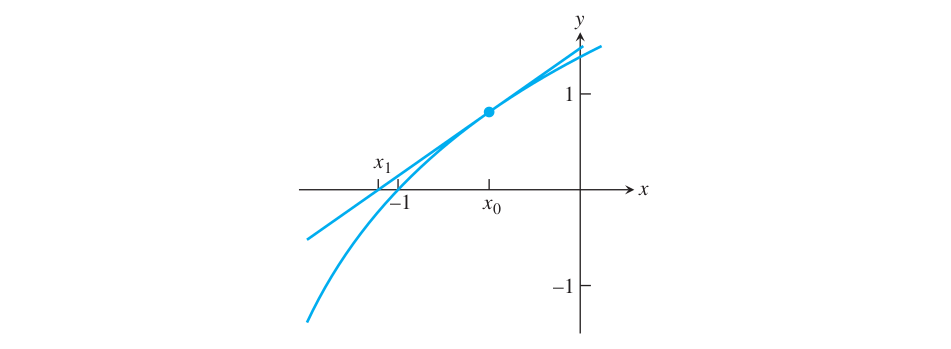

##### algorithm


$$x_{i+1} = g(x_i), \quad g(x) = x - \frac{f(x)}{f'(x)}.$$
</br>

```
function fpi(g,x0,epsilon,imax)

function g(x)
  return x - f(x)/df(x)
```


##### code


###### fixed point iteration, reused


from lecture 03, 2nd version that takes function $g(x)$ as argument.


```
# 240206 ksa  renamed function from "f_fpi2" to "fpi"
# 240206 ksa  renamed argument from "af" to "ag"
```


In [ ]:
def fpi(ag,ax0,aepsilon,aimax):
  rc = 0
  isteps = 0
  x = ax0
  gx = ag(x)
  while (abs(gx - x) > aepsilon) and (isteps < aimax):
    x = gx
    gx = ag(x)
    isteps += 1 # common shortcut for isteps = isteps + 1
  rc = x
  return rc,isteps

###### newtons method


find cube root of 27 $\Rightarrow f(x) = x^3 - 27 = 0$.

In [ ]:
f = lambda x : pow(x,3) - 27
df = lambda x : 3*pow(x,2)

g = lambda x : x - f(x)/df(x) # newtons method

x0 = 4 # just bc
epsilon = 1e-4
maxiter = 100
root,iterations = fpi(g,x0,epsilon,maxiter)
print(root,iterations)


3.0000834553024767 3


[lambda functions](https://www.w3schools.com/python/python_lambda.asp)

#### 1.4.1 quadratic convergence of newtons method


<b>def 1.10</b> let $e_i$ denote error after step $i$ of iterative method. iteration is <b>quadratically convergent</b> if
</br></br>

$$M = \lim_{i\rightarrow\infty}\frac{e_{i+1}}{e_i^2}<\infty.$$
</br>

<b>th 1.11</b> let $f$ be twice continuously differentiable and $f(x^*) = 0$. if $f'(x^*) \ne 0$, then newtons is locally and quadratically convergent to $x^*$. error $e_i$ at step $i$ satisfies
</br></br>

$$\lim_{i\rightarrow\infty}\frac{e_{i+1}}{e_i^2} = M,$$
</br>

where
</br>

$$M = \frac{f''(x^*)}{2f'(x^*)}.$$
</br>



##### proof


to prove local convergence, note that newtons method is a particular form of FPI where
</br></br>

\begin{align}
  g(x) &= x - \frac{f(x)}{f'(x)}, \\ \\
  g'(x) &= 1 - \frac{f'(x)^2 - f(x)f''(x)}{f'(x)^2} = \frac{f(x)f''(x)}{f'(x)^2}.
\end{align}
</br>

$g'(x^*) = 0$ so locally convergent by th 1.6.
</br>


to prove quadratic convergence, derive newtons method with taylors formula. at $i$ steps,
</br></br>

\begin{align}
  f(x^*) &= f(x_i) + (x^*-x_i)f'(x_i) + \frac{(x^*-x_i)^2}{2}f''(c_i) \\
  \\
  &\quad\Downarrow \quad c_i\text{ between }x_i,x^* \\
  \\
  0 &= f(x_i) + (x^*-x_i)f'(x_i) + \frac{(x^*-x_i)^2}{2}f''(c_i) \\
  \\
  &\quad\Downarrow \\
  \\
  -\frac{f(x_i)}{f'(x_i)} &= x^* - x_i + \frac{(x^*-x_i)^2}{2}\frac{f''(c_i)}{f'(x_i)}, \quad f'(x_i) \ne 0 \\
  \\
  &\quad\Downarrow \\
  \\
  x_i - \frac{f(x_i)}{f'(x_i)} - x^* &= \frac{(x^*-x_i)^2}{2}\frac{f''(c_i)}{f'(x_i)} \\
  \\
  &\quad\Downarrow \quad e_i = |x_i-x^*| \\
  \\
  x_{i+1} - x^* &= e_i^2\frac{f''(c_i)}{f'(x_i)} \\
  \\
  &\quad\Downarrow \\
  \\
  e_{i+1} &= e_i^2\frac{f''(c_i)}{f'(x_i)}
\end{align}
</br>

bc $c_i$ is between $x_i,x^*$, it converges to $x^*$ as $x_i$ converges to $x^*$ and
</br>

$$\lim_{i\rightarrow\infty} \frac{e_{i+1}}{e_i^2} = \left| \frac{f''(x^*)}{2f'(x^*)} \right|,$$
</br>

which is the definition of quadratic convergence. $\blacksquare$
</br>


#### 1.4.2 linear convergence of newtons method


<b>th 1.12</b> assume that $(m+1)$-times continuously differentiable function $f$ on $[a,b]$ has multiplicity $m$ roots at $x^*$. then newtons is locally convergent to $x^*$ and error $e_i$ at step $i$ satisfies
</br></br>

$$\lim_{i\rightarrow\infty} \frac{e_{i+1}}{e_i} = S,$$
</br>

where $S = \frac{m-1}{m}$.
</br></br>

<b>th 1.13</b> if $f$ $(m+1)$-times continuously differentiable pm $[a,b]$, which contains root $x^*$ of multiplicity $m>1$, then <b>modified newtons method</b>
</br></br>

$$x_{i+1} = x_i - \frac{mf(x_i)}{f'(x_i)}$$
</br>

converges locally and quadratically to $x^*$.
</br>


### 1.5 root-finding without derivatives

what if $f(x)$ has no (or unknown) $f'(x)$?
</br>

#### 1.5.1 secant method, variants

##### secant method

secant replaces the derivative with a difference quotient. ie, replace tangent line with line through previous two guesses. ie, approximation for derivative at $x_i$ is difference quotient
</br></br>

$$\frac{f(x_i)-f(x_{i-1})}{x_i-x_{i-1}}.$$
</br>

<b>secant method</b>
</br></br>

\begin{align}
  x_0,x_1 &\quad\text{initial guesses} \\
  x_{i+1} &= x_i - f(x_i)\cdot\frac{x_i-x_{i-1}}{f(x_i)-f(x_{i-1})} \quad i = 1,2,3,\dots
\end{align}
</br>


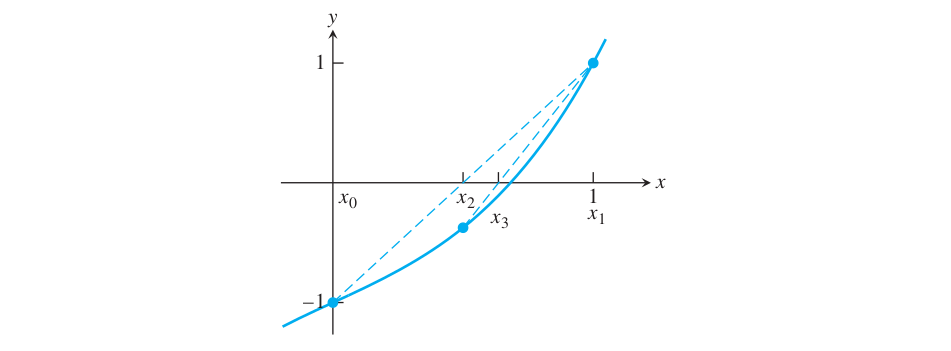

###### algorithm






```
icount = 0

fx_old = f(x_old)
if abs(fx_old) < epsilon # epsilon ~ eta
  return x_old
fx_older = f(x_older)
if abs(fx_older) < epsilon # epsilon ~ eta
  return x_older

dq = (fx_old - fx_older)/(x_old - x_older)
x_new = x_old - fx_old/dq
fx = f(x_new)
icount = icount + 1

# while (abs(fx) > epsilon) and (icount <= imax): # epsilon ~ eta
while (abs(x_new - x_old) > epsilon) and (icount <= imax):
  x_older = x_old
  fx_older = fx_old
  x_old = x_new
  fx_old = fx
  dq = (fx_old - fx_older)/(x_old - x_older)
  x_new = x_old - fx_old/dq
  fx = f(x_new)
  icount = icount + 1

return x_new
```



###### code


In [ ]:
# not soup yet


##### variants


###### <b>method of false position</b> aka <b>regula falsi</b>

similar to bisection but replace midpoint with secant method-like approximation. ie,
</br></br>

$$c = a - \frac{f(a)\cdot (a-b)}{f(a)-f(b)} = \frac{b\cdot f(a)-a\cdot f(b)}{f(a)-f(b)}.$$
</br>


###### <b>mullers method</b>


draw parabola $y= p(x)$ through three previous points (vs line through two previous points) and its intersection with $x$-axis closest to $x_i$ is next iteration $x_{i+1}$.
</br>


oscar velize [@youtube](https://www.youtube.com/watch?v=XIIEjwtkONc)
</br>


###### <b>inverse quadratic interpolation (IQI)</b>


similar to mullers but with parabola $x=p(y)$.
</br>


douglas harder [@youtube](https://www.youtube.com/watch?v=r1WnrAwfekE) [@wiki](https://en.wikipedia.org/wiki/Inverse_quadratic_interpolation)


#### 1.5.2 brents method


this hybrid method uses concepts of secant method, its generalizations and bisection.
</br></br>

for continuous function $f$ over bounded interval $[a,b]$ where $f(a)\cdot f(b)<0$, brents method keeps track of current $x_i$ that is best in sense of backward error and bracket $[a_i,b_i]$ of root. roughly speaking brents uses IQI to replace one of $x_i,a_i,b_i$ if (1) the backward error improves and (2) the bracketing interval is cut at least in half. if that fails, the secant method is attempted. if that fails, bisection occurs which guarantees that uncertainty is lat least halved.
</br>


* oscar veliz [@youtube](https://www.youtube.com/watch?v=-bLSRiokgFk)
</br>

* library function documentation [@scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) [@matlab](https://www.mathworks.com/help/matlab/ref/fzero.html)
* matlab [@online](https://matlab.mathworks.com)
